    Zuzana Hosszúrétyová, kurz WDA2
    30.01.2020


### Zadanie
1. Načítajte súbor `Accidents.csv`, rozdeľte ho na tri tabuľky podľa hodnôt atribútu `Accident_Severity` (do prvej tabuľky vyberte iba hodnoty 1 - `Fatal`, do druhej 2 - `Serious` a do tretej 3 - `Slight`). (2b)



In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline

sns.set()

In [2]:
data_A = pd.read_csv("../data/Accidents.csv")
data_A.shape

(198735, 32)

In [3]:
data_A.head(1)

,Accident_Index,Location_Easting_OSGR,Location_Northing_OSGR,Longitude,Latitude,Police_Force,Accident_Severity,Number_of_Vehicles,Number_of_Casualties,Date,...,Pedestrian_Crossing-Human_Control,Pedestrian_Crossing-Physical_Facilities,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Special_Conditions_at_Site,Carriageway_Hazards,Urban_or_Rural_Area,Did_Police_Officer_Attend_Scene_of_Accident,LSOA_of_Accident_Location
0,200501BS00001,525680.0,178240.0,-0.19117,51.489096,1,2,1,1,04/01/2005,...,0,1,1,2,2,0,0,1,1,E01002849


In [4]:
Fatal = data_A.query("Accident_Severity == 1")
Serious = data_A.query("Accident_Severity == 2")
Slight = data_A.query("Accident_Severity == 3")

In [5]:
data_A["Accident_Severity"].value_counts()

3    170793
2     25029
1      2913
Name: Accident_Severity, dtype: int64

2. Z tabuľky pre hodnoty `Slight` náhodne vyberte 10% príkladov pomocou metódy `sample`. Nasledujúci príklad kódu zobrazuje použitie tejto metódy. (2b)

In [7]:
# `frac` udáva koľko príkladov sa má náhodne vybrať (0.1 = 10%), `random_state` inicializuje generátor
# náhodných čísel, aby sme vždy dostali rovnaký výber
# sample_data = accidents_slight.sample(frac=0.1, random_state=1234)

In [6]:
Slight_sample = Slight.sample(frac=0.1, random_state=1234)

3. Spojte všetky tri tabuľky do upravenej tabuľky `Accidents`, ktorá bude obsahovať 10% príkladov `Slight` a všetky príklady závažnosti `Fatal` a `Serious`. Po spojení by ste mali mať 45 021 príkladov. (2b)

In [7]:
Accidents= pd.concat([Fatal, Serious, Slight_sample], ignore_index=True, sort=False)
Accidents.shape

(45021, 32)

4. Spojte upravenú tabuľku `Accidents` s tabuľkou `Vehicles` podľa kľúča `Accident_Index` tak, aby vo výslednej tabuľke boli iba vozidla nehôd z upravenej tabuľky `Accidents`. Po spojení by ste mali dostať redukovanú trénovaciu množinu s menším počtom príkladov, ktorú budete ďalej používať pre analýzu dát. Keďže sme zmenšili počet menej závažných príkladov, zvýšili sme tým váhu príkladov s väčšou závažnosťou. (2b)


In [8]:
data_V = pd.read_csv("../data/Vehicles.csv")

In [9]:
data_AV = pd.merge(left=Accidents, right=data_V, left_on="Accident_Index", right_on="Accident_Index", how="left")
print(len(data_A), len(Accidents), len(data_V), len(data_AV))

198735 45021 366236 79382


5. Pre ďalšiu analýzu vyberte iba nasledujúce atribúty:
    * `Day_of_Week`
    * `1st_Road_Class`
    * `Road_Type`
    * `Light_Conditions`
    * `Weather_Conditions`     
    * `Road_Surface_Conditions`
    * `Urban_or_Rural_Area`
    * `Vehicle_Type`
    * `Sex_of_Driver`
    * `Age_of_Driver`
    * `Engine_Capacity_(CC)`
    * `Age_of_Vehicle`
    * `Accident_Severity` 
    
Takúto selekciu atribútov urobíme kvôli odstráneniu redundantných atribútov v datasete. Nepoužijeme redundantné atribúty popisujúce napr. geolokalitu, atď., prípadne odstránime atribúty, ktoré pre predikciu nemôžu byť použité (nie sú známe pred výskytom samotnej nehody). (2b)


In [10]:
data_AV_select = data_AV[["Day_of_Week", "1st_Road_Class", "Road_Type","Light_Conditions","Weather_Conditions","Road_Surface_Conditions","Urban_or_Rural_Area","Vehicle_Type","Sex_of_Driver","Age_of_Driver","Engine_Capacity_(CC)","Age_of_Vehicle","Accident_Severity"]]

In [11]:
data_AV_select.shape

(79382, 13)

In [12]:
data_AV_select.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1,1,5,1,40,984,-1,1
1,4,3,2,1,1,1,1,1,1,20,-1,-1,1
2,4,5,6,1,1,1,1,11,1,59,9600,5,1
3,5,4,6,1,1,2,1,1,1,25,-1,-1,1
4,5,4,6,1,1,2,1,9,1,29,1596,3,1


6. Spočítajte počet chýbajúcich hodnôt pre jednotlivé atribúty. Vhodne doplňte chýbajúce hodnoty (pozor: chýbajúce hodnoty sú označené -1).(4b)


In [13]:
def missing_units(x):
    if x < 0:
        return None
    if x >= 0:
        return x
    
dataset = data_AV_select.applymap(missing_units)

In [14]:
for i in dataset.columns:
    print('Pocet chybajucich hodnot atributu', i, ':', dataset[i].isna().sum())

Pocet chybajucich hodnot atributu Day_of_Week : 0
Pocet chybajucich hodnot atributu 1st_Road_Class : 0
Pocet chybajucich hodnot atributu Road_Type : 0
Pocet chybajucich hodnot atributu Light_Conditions : 0
Pocet chybajucich hodnot atributu Weather_Conditions : 0
Pocet chybajucich hodnot atributu Road_Surface_Conditions : 80
Pocet chybajucich hodnot atributu Urban_or_Rural_Area : 0
Pocet chybajucich hodnot atributu Vehicle_Type : 14
Pocet chybajucich hodnot atributu Sex_of_Driver : 7
Pocet chybajucich hodnot atributu Age_of_Driver : 7784
Pocet chybajucich hodnot atributu Engine_Capacity_(CC) : 24978
Pocet chybajucich hodnot atributu Age_of_Vehicle : 27406
Pocet chybajucich hodnot atributu Accident_Severity : 0


In [15]:
dataset['Weather_Conditions'].value_counts()


1    64866
2     8526
8     1821
4     1082
9     1078
5      792
3      573
7      530
6      114
Name: Weather_Conditions, dtype: int64

In [16]:
# Doplnenie chýbajúcich hodnôt pre "Road_Surface_Conditions"
# podľa "Weather_Conditions"

def replace_missing_Road_Surface_Conditions(row):
    if pd.isna(row['Road_Surface_Conditions']):
        if row['Weather_Conditions'] == 1: # 1-Fine weather
            return 1                       # 1-Dry road
        if row['Weather_Conditions'] == 2: # 2-Raining
            return 2                       # 2-Wet road
        if row['Weather_Conditions'] == 3: # 3-Snowing
            return 3                       # 3-Snow
        if row['Weather_Conditions'] == 4: # 4-Fine+high winds
            return 1                       # 1-Dry road
        if row['Weather_Conditions'] == 5: # 5-Raining+high winds
            return 5                       # 5-Flood over3cm
        if row['Weather_Conditions'] == 6: # 6-Snowing+high winds
            return 4                       # 4-Frost or ice
        else:                              # inak sa použije 1=Fine má najväčšiu početnosť 
            return 1                       # 1-Dry road
                                           
    else:
        return row['Road_Surface_Conditions']

dataset['Road_Surface_Conditions'] = dataset.apply(replace_missing_Road_Surface_Conditions, axis = 1)

dataset['Road_Surface_Conditions'].isna().sum()

0

In [17]:
dataset["Sex_of_Driver"].value_counts()

1.0    56005
2.0    19020
3.0     4350
Name: Sex_of_Driver, dtype: int64

In [18]:
# Doplnenie chýbajúcich hodnôt pre "Sex_of_Driver" hodnotou 3 - Not known
dataset["Sex_of_Driver"].fillna(3.0, inplace=True)
dataset["Sex_of_Driver"].isna().sum()

0

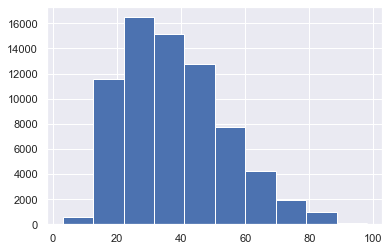

In [19]:
p = dataset["Age_of_Driver"].hist()

In [20]:
age_mean = dataset["Age_of_Driver"].mean()
age_median = dataset["Age_of_Driver"].median()
print("age mean: {0:.4f}, median: {1:.4f}".format(age_mean, age_median))

age mean: 37.8645, median: 36.0000


In [21]:
# Doplnenie chýbajúcich hodnôt pre "Age_of_Driver" mediánom:
dataset["Age_of_Driver"].fillna(dataset["Age_of_Driver"].median(), inplace=True)
dataset["Age_of_Driver"].isna().sum()

0

In [22]:
dataset["Vehicle_Type"].value_counts()

9.0     55695
5.0      4434
1.0      3929
19.0     3514
21.0     2463
3.0      2121
11.0     2018
2.0      1321
8.0      1180
4.0       908
20.0      698
90.0      532
10.0      281
17.0      230
16.0       32
18.0       12
Name: Vehicle_Type, dtype: int64

In [23]:
dataset["Vehicle_Type"].fillna(9.0, inplace=True)
dataset["Vehicle_Type"].isna().sum()

0

In [24]:
# Diskretizácia hodnôt "Vehicle_Type" pre použitie v kontingenčnej tabuľke
dataset["Vehicle_Type_ordinal"] = pd.cut(dataset["Vehicle_Type"], bins=[0, 1, 5, 9, 11, 100], include_lowest=True, labels=["bicykel","motorka", "auto", "bus","ine"])
dataset["Vehicle_Type_ordinal"].value_counts()


auto       56889
motorka     8784
ine         7481
bicykel     3929
bus         2299
Name: Vehicle_Type_ordinal, dtype: int64

In [25]:
dataset["Vehicle_Type_ordinal"].isna().sum()

0

In [26]:
# Doplnenie chýbajúcich údajov pre "Vehicle_Type_ordinal" atribútom s najväčším výskytom
dataset["Vehicle_Type_ordinal"].fillna("auto", inplace=True)
dataset["Vehicle_Type_ordinal"].isna().sum()

0

In [27]:
ptable = pd.pivot_table(dataset, index="Vehicle_Type_ordinal", values="Engine_Capacity_(CC)",aggfunc=["median"])
ptable

,median
,Engine_Capacity_(CC)
Vehicle_Type_ordinal,
motorka,599.0
auto,1598.0
bus,7300.0
ine,2496.0


In [28]:
# Doplnenie chýbajúcich hodnôt pre "Engine_Capacity_(CC)"podľa atribútu "Vehicle_Type_ordinal"

def replace_missing_Engine_Capacity(row):
    Vehicle_Type_ordinal = row["Vehicle_Type_ordinal"]
    Engine_Capacity_(CC) = row["Engine_Capacity_(CC)"]
    if pd.isna(Engine_Capacity_(CC)):
        return ptable["Engine_Capacity_(CC)"][(Vehicle_Type_ordinal)]
    else:
        return Engine_Capacity_(CC)

dataset["Engine_Capacity_(CC)"] = dataset.apply(replace_missing_Engine_Capacity, axis = 1)
dataset["Engine_Capacity_(CC)"].isna().sum()

SyntaxError: can't assign to function call (<ipython-input-28-23520ee25d30>, line 5)

In [29]:
# Nevedela som prísť na chybu vyššie, tak tu je náhradný postup:

def replace_missing_Engine_Capacity(row):
    if pd.isna(row['Engine_Capacity_(CC)']):
        if row['Vehicle_Type_ordinal'] == "motorka":
            return 599                       
        if row['Vehicle_Type_ordinal'] == "auto":
            return 1598                       
        if row['Vehicle_Type_ordinal'] == "bus":
            return 7300                      
        if row['Vehicle_Type_ordinal'] == "ine":
            return 2496
        else:                              # inak sa použije CC pre"auto" má najväčšiu početnosť 
            return 1598                    
                                           
    else:
        return row['Engine_Capacity_(CC)']

dataset['Engine_Capacity_(CC)'] = dataset.apply(replace_missing_Engine_Capacity, axis = 1)

dataset['Engine_Capacity_(CC)'].isna().sum()

0

In [30]:
age = dataset[["Age_of_Driver","Age_of_Vehicle"]]
corr_table = age.corr()
corr_table

,Age_of_Driver,Age_of_Vehicle
Age_of_Driver,1.000000,-0.033167
Age_of_Vehicle,-0.033167,1.000000


In [31]:
age_mean = dataset["Age_of_Vehicle"].mean()
age_median = dataset["Age_of_Vehicle"].median()
age_q75 = dataset["Age_of_Vehicle"].quantile(0.75)
print("age mean: {0:.4f}, median: {1:.4f}, q75: {2:.4f}".format(age_mean, age_median, age_q75))

age mean: 6.6582, median: 6.0000, q75: 9.0000


In [32]:
# Doplnenie chýbajúcich hodnôt pre "Age_of_Vehicle" 75% kvartilom
dataset["Age_of_Vehicle"].fillna(dataset["Age_of_Vehicle"].quantile(0.75), inplace=True)
dataset["Age_of_Vehicle"].isna().sum()

0

In [33]:
dataset.isna().sum()

Day_of_Week                0
1st_Road_Class             0
Road_Type                  0
Light_Conditions           0
Weather_Conditions         0
Road_Surface_Conditions    0
Urban_or_Rural_Area        0
Vehicle_Type               0
Sex_of_Driver              0
Age_of_Driver              0
Engine_Capacity_(CC)       0
Age_of_Vehicle             0
Accident_Severity          0
Vehicle_Type_ordinal       0
dtype: int64

7. Pomocou kontigenčnej tabuľky vyjadrite závislosti medzi nasledujúcimi atribútmi a cieľovým atribútom `Accident_Severity`:
* `Day_of_Week` 
* `Sex_of_Driver`
* `Age_of_Driver` (nutné vhodne diskretizovať tento atribút)

Použite niektorú z vizualizácií knižnice seaborn na grafické zobrazenie týchto vzťahov. (5b)

In [34]:
max_age = dataset["Age_of_Driver"].max()
dataset["Age_of_Driver_ordinal"] = pd.cut(dataset["Age_of_Driver"], bins=[0, 13, 19, 65, max_age], include_lowest=True, labels=["child","teenager", "adult", "senior"])
dataset["Age_of_Driver_ordinal"].value_counts()

adult       66984
teenager     7413
senior       4279
child         706
Name: Age_of_Driver_ordinal, dtype: int64

In [35]:
pd.pivot_table(dataset, index="Day_of_Week", values="Accident_Severity", aggfunc="mean")

,Accident_Severity
Day_of_Week,
1,2.268705
2,2.357607
3,2.360809
4,2.362889
5,2.359098
6,2.348189
7,2.293252


In [36]:
pd.pivot_table(dataset, index="Sex_of_Driver", values="Accident_Severity", aggfunc="mean")

,Accident_Severity
Sex_of_Driver,
1.0,2.300116
2.0,2.433596
3.0,2.400046


In [37]:
pd.pivot_table(dataset, index="Age_of_Driver_ordinal", values="Accident_Severity",aggfunc="mean")

,Accident_Severity
Age_of_Driver_ordinal,
child,2.359773
teenager,2.305275
adult,2.346963
senior,2.243047


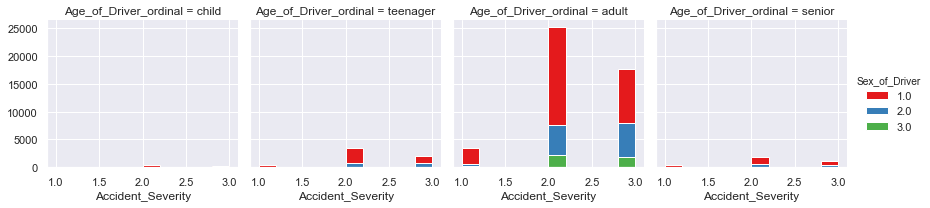

In [38]:
g = sns.FacetGrid(dataset, col="Age_of_Driver_ordinal", hue="Sex_of_Driver", palette="Set1")
g = (g.map(plt.hist, "Accident_Severity").add_legend())

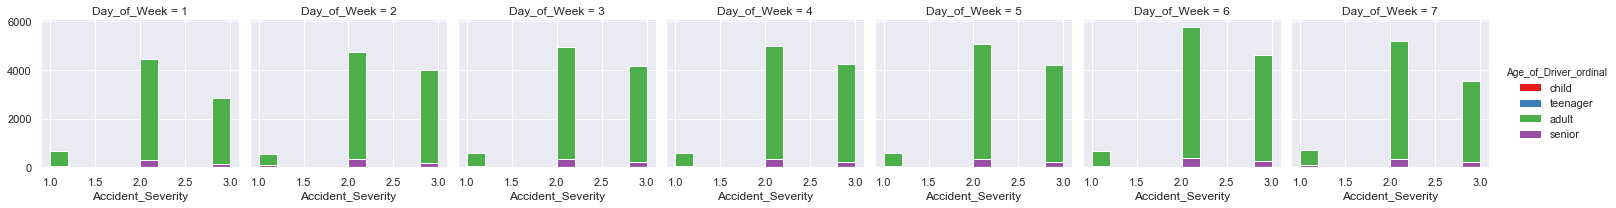

In [39]:
g = sns.FacetGrid(dataset, col="Day_of_Week", hue="Age_of_Driver_ordinal", palette="Set1")
g = (g.map(plt.hist, "Accident_Severity").add_legend())

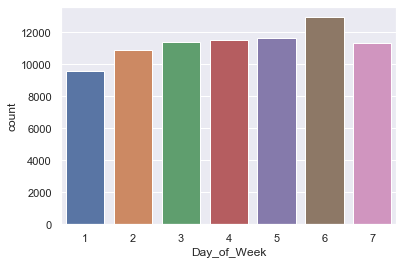

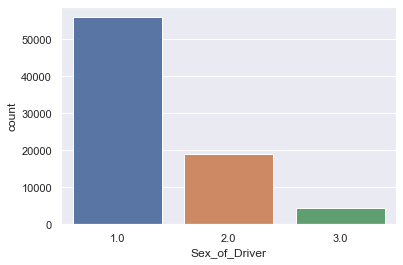

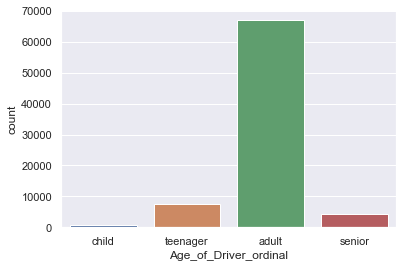

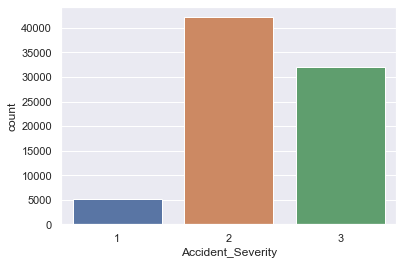

In [40]:
for i in ["Day_of_Week", "Sex_of_Driver","Age_of_Driver_ordinal", "Accident_Severity" ]:
    plt.figure(i)
    sns.countplot(x=i, data=dataset)

8. Vytvorte dátovú množinu, v ktorej nahradíte všetky nominálne atribúty za číselné alebo binárne. (3b)

In [41]:
dataset.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity,Vehicle_Type_ordinal,Age_of_Driver_ordinal
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,9.0,1,motorka,adult
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,1598.0,9.0,1,bicykel,adult
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1,bus,adult
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,1598.0,9.0,1,bicykel,adult
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1,auto,adult


In [42]:
dataset.columns

Index(['Day_of_Week', '1st_Road_Class', 'Road_Type', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Type', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity',
       'Vehicle_Type_ordinal', 'Age_of_Driver_ordinal'],
      dtype='object')

In [43]:
dataset2 = dataset.drop(columns=["Age_of_Driver_ordinal","Vehicle_Type_ordinal"])

In [44]:
dataset2.columns

Index(['Day_of_Week', '1st_Road_Class', 'Road_Type', 'Light_Conditions',
       'Weather_Conditions', 'Road_Surface_Conditions', 'Urban_or_Rural_Area',
       'Vehicle_Type', 'Sex_of_Driver', 'Age_of_Driver',
       'Engine_Capacity_(CC)', 'Age_of_Vehicle', 'Accident_Severity'],
      dtype='object')

In [45]:
dataset2.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,4,3,2,1,1,1.0,1,5.0,1.0,40.0,984.0,9.0,1
1,4,3,2,1,1,1.0,1,1.0,1.0,20.0,1598.0,9.0,1
2,4,5,6,1,1,1.0,1,11.0,1.0,59.0,9600.0,5.0,1
3,5,4,6,1,1,2.0,1,1.0,1.0,25.0,1598.0,9.0,1
4,5,4,6,1,1,2.0,1,9.0,1.0,29.0,1596.0,3.0,1


In [46]:
dataset2.shape

(79382, 13)

9. Rozdeľte dáta na trénovaciu a testovaciu množinu v pomere 70/30. Ako cieľový atribút použite atribút `Accident_Severity`. (2b)

In [47]:
# normalizácia dát

from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()

normDataset2 = pd.DataFrame(scaler.fit_transform(dataset2), index= dataset2.index, columns= dataset2.columns)
normDataset2.head()

,Day_of_Week,1st_Road_Class,Road_Type,Light_Conditions,Weather_Conditions,Road_Surface_Conditions,Urban_or_Rural_Area,Vehicle_Type,Sex_of_Driver,Age_of_Driver,Engine_Capacity_(CC),Age_of_Vehicle,Accident_Severity
0,0.500000,0.4,0.125,0.0,0.0,0.00,0.0,0.044944,0.0,0.389474,0.016334,0.096386,0.0
1,0.500000,0.4,0.125,0.0,0.0,0.00,0.0,0.000000,0.0,0.178947,0.026589,0.096386,0.0
2,0.500000,0.8,0.625,0.0,0.0,0.00,0.0,0.112360,0.0,0.589474,0.160236,0.048193,0.0
3,0.666667,0.6,0.625,0.0,0.0,0.25,0.0,0.000000,0.0,0.231579,0.026589,0.096386,0.0
4,0.666667,0.6,0.625,0.0,0.0,0.25,0.0,0.089888,0.0,0.273684,0.026556,0.024096,0.0


In [48]:
from sklearn.model_selection import train_test_split

X_data = dataset2.drop(columns= 'Accident_Severity', axis = 1)
y_data = dataset2['Accident_Severity']
X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size= 0.3, random_state= 1)


X_normData = normDataset2.drop(columns= 'Accident_Severity', axis = 1)
y_normData = normDataset2['Accident_Severity']
X_train_norm, X_test_norm, y_train_norm, y_test_norm = train_test_split(X_normData, y_normData, test_size= 0.3, random_state= 1)

In [49]:
print("Trenovacia mnozina:")
print(X_train.shape)
print(y_train.shape)
print("Testovacia mnozina:")
print(X_test.shape)
print(y_test.shape)

Trenovacia mnozina:
(55567, 12)
(55567,)
Testovacia mnozina:
(23815, 12)
(23815,)


In [50]:
print("Trenovacia mnozina normovana:")
print(X_train_norm.shape)
print(y_train_norm.shape)
print("Testovacia mnozina normovana:")
print(X_test_norm.shape)
print(y_test_norm.shape)

Trenovacia mnozina normovana:
(55567, 12)
(55567,)
Testovacia mnozina normovana:
(23815, 12)
(23815,)


10. Spočítajte pomocou funkcie `SelectKBest` a `mutual_score_info` významosti jednotlivých atribútov pre predikciu v trénovacej množine. Skúste získané informácie využiť pri predspracovaní dát pre niektoré z modelov. (3b)

In [51]:
from sklearn.feature_selection import SelectKBest, mutual_info_classif

fs = SelectKBest(score_func=mutual_info_classif, k="all").fit(X_train, y_train)
print(fs.scores_)

[0.00494215 0.00055646 0.00928446 0.01090215 0.00167967 0.
 0.020653   0.01927525 0.00490381 0.00441752 0.01587071 0.00017894]


In [52]:
print(mutual_info_classif(X_train, y_train, random_state = 123))

[0.00226996 0.0044869  0.00834506 0.0117727  0.00367663 0.00332504
 0.02157648 0.01809585 0.00597671 0.0034928  0.01386355 0.        ]


11. Natrénujte rôzne klasifikačné modely pre predikciu atribútu `Accident_Severity`. Natrénujte nasledovné modely s prednastavenými parametrami:
* k-najbližších susedov
* Rozhodovacie stromy
* Random forests

Jednotlivé modely otestujte pomocou 10-násobnej krížovej validácie pomocou metriky `accuracy`. 

Pozor - pre jednotlivé modely zvoľte vhodný spôsob predspracovania (možná modifikácia predspracovania v kroku 8). (6b) 

In [53]:
from sklearn.neighbors import KNeighborsClassifier 
model = KNeighborsClassifier()                      
model.fit(X_train, y_train)                          
y_model = model.predict(X_test)   

from sklearn.metrics import accuracy_score, precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_model)}")

Presnosť (accuracy) modelu: 0.5056896913709846


In [54]:
from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import confusion_matrix

dt = DecisionTreeClassifier(max_depth=3)
dt.fit(X_train, y_train)
y_dt = dt.predict(X_test)

from sklearn.metrics import accuracy_score,precision_score, recall_score

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_dt)}")

cm = confusion_matrix(y_test, y_dt)
print(cm)


Presnosť (accuracy) modelu: 0.5591014066764645
[[   0 1350  221]
 [   0 9059 3660]
 [   0 5269 4256]]


In [55]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, confusion_matrix

rf = RandomForestClassifier(n_estimators=500, max_depth=3)
rf.fit(X_train, y_train)

y_rf = rf.predict(X_test)

print(f"Presnosť (accuracy) modelu: {accuracy_score(y_test, y_rf)}")
cm = confusion_matrix(y_test, y_rf)
print(cm)

Presnosť (accuracy) modelu: 0.5477220239344951
[[    0  1552    19]
 [    0 12357   362]
 [    0  8838   687]]


12. Porovnajte natrénované modely aj pomocou ROC krivky testovacej množine. Identifikujte model, ktorý dáva najlepšie výsledky s prednastavenými parametrami. 
V tomto kroku sa posnažte vyladiť model nájdením najvhodnejších parametrov pomocou `GridSearchCV`. Nájdite a vypíšte najlepšiu kombináciu parametrov. (4b)

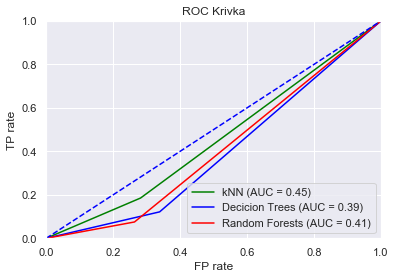

In [56]:
# ROC KRIVKY

from sklearn.metrics import roc_curve,auc

# k-NN

knn = KNeighborsClassifier()

knn = KNeighborsClassifier(n_neighbors= 30, weights= 'uniform', metric= 'manhattan')
knn.fit(X_train, y_train)
y_knn=knn.predict(X_test)

fpr_knn, tpr_knn, thresholds_knn = roc_curve(y_test, y_knn, pos_label=1)
roc_auc_knn = auc(fpr_knn, tpr_knn)

# stromy

dt = DecisionTreeClassifier()

dt = DecisionTreeClassifier(criterion= 'entropy', max_depth= 5, min_samples_leaf= 5, min_samples_split= 4, presort= True)
dt.fit(X_train, y_train)
y_dt=dt.predict(X_test)

fpr_dt, tpr_dt, thresholds_dt = roc_curve(y_test, y_dt, pos_label=1)
roc_auc_dt = auc(fpr_dt, tpr_dt)

# Random Forests

rf = RandomForestClassifier()

rf = RandomForestClassifier(n_estimators= 700, oob_score= True, criterion= 'gini', max_depth= 6, min_samples_split =  6, min_samples_leaf =  10)
rf.fit(X_train, y_train)
y_rf=rf.predict(X_test)

fpr_rf, tpr_rf, thresholds_rf = roc_curve(y_test, y_rf, pos_label=1)
roc_auc_rf = auc(fpr_rf, tpr_rf)



plt.title('ROC Krivka')

plt.plot(fpr_knn, tpr_knn, color='green', label = 'kNN (AUC = %0.2f)' % roc_auc_knn) 
plt.plot(fpr_dt, tpr_dt, color='blue', label = 'Decicion Trees (AUC = %0.2f)' % roc_auc_dt) 
plt.plot(fpr_rf, tpr_rf, color='red', label = 'Random Forests (AUC = %0.2f)' % roc_auc_rf) 

plt.legend(loc = 'lower right') 
plt.plot([0, 1], [0, 1],linestyle='--', color='blue')
plt.xlim([0, 1]) 
plt.ylim([0, 1])
plt.ylabel('TP rate') 
plt.xlabel('FP rate') 
plt.show()

In [58]:
from sklearn.model_selection import GridSearchCV
from sklearn.neighbors import KNeighborsClassifier


knn = KNeighborsClassifier()
k = list(range(1, 50))
weights_range = ['uniform', 'distance']
metric_range = ['euclidean', 'manhattan']  

param_grid_kNN = dict(n_neighbors=k, weights=weights_range, metric=metric_range)

grid_kNN = GridSearchCV(estimator=knn, param_grid=param_grid_kNN, cv=5, scoring='accuracy')
grid_kNN.fit(X_train_norm, y_train_norm)

print('Najlepšia kombinácia parametrov modelu "kNN" je:')
print(grid_kNN.best_params_)
print()
print('Hodnota presnosti modelu "kNN" pri tejto kombinácii je:')
print(grid_kNN.best_score_)

C:\Users\Pouzivatel\Anaconda3\lib\site-packages\sklearn\model_selection\_validation.py:530: FutureWarning: From version 0.22, errors during fit will result in a cross validation score of NaN by default. Use error_score='raise' if you want an exception raised or error_score=np.nan to adopt the behavior from version 0.22.
  FutureWarning)


ValueError: Unknown label type: 'continuous'

In [59]:
from sklearn.tree import DecisionTreeClassifier

dt = DecisionTreeClassifier()

criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6] 
min_samples_split_range = [2, 4, 6, 8, 10, 12]
min_samples_leaf_range = [1, 5, 10]
presort_range = [True, False]

param_grid_dt = dict(criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range, presort = presort_range )

grid_dt = GridSearchCV(estimator=dt, param_grid=param_grid_dt, cv=5, scoring='accuracy')
grid_dt.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "decision_tree" je:')
print(grid_dt.best_params_)
print()
print('Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:')
print(grid_dt.best_score_)

Najlepšia kombinácia parametrov modelu "decision_tree" je:
{'criterion': 'gini', 'max_depth': 5, 'min_samples_leaf': 10, 'min_samples_split': 2, 'presort': True}

Hodnota presnosti modelu "decision_tree" pri tejto kombinácii je:
0.5644897151186855


In [ ]:
from sklearn.ensemble import RandomForestClassifier

rf = RandomForestClassifier()

n_estimators_range = [100, 300, 500, 700, 900]
oob_score_range = [True, False]
criterion_range = ['gini', 'entropy']
max_depth_range = [1, 2, 3, 4, 5, 6]
min_samples_split_range = [2, 4, 6]
min_samples_leaf_range = [1, 5, 10]

param_grid_rf = dict(n_estimators=n_estimators_range, oob_score=oob_score_range, criterion=criterion_range, max_depth=max_depth_range, min_samples_split = min_samples_split_range, min_samples_leaf = min_samples_leaf_range)

grid_rf = GridSearchCV(estimator=rf, param_grid=param_grid_rf, cv=5, scoring='accuracy')
grid_rf.fit(X_train, y_train)

print('Najlepšia kombinácia parametrov modelu "random_forests" je:')
print(grid_rf.best_params_)
print()
print('Hodnota presnosti modelu "random_forests" pri tejto kombinácii je:')
print(grid_rf.best_score_)

13. Natrénujte na celej trénovacej množine model s najlepšími parametrami. Model otestujte na testovacej množine. Vyhodnoťte model pomocou metrík `accuracy`, `precision` a `recall`. Vypíšte preň `confusion matrix`. (3b)

In [ ]:
from sklearn.metrics import confusion_matrix
from sklearn.metrics import accuracy_score,precision_score, recall_score

# k-NN

print('kNN accuracy: %0.2f' % accuracy_score(y_test_norm, y_knn))
print('kNN precision: %0.2f' %  precision_score(y_test_norm, y_knn))
print('kNN recall: %0.2f' %  recall_score(y_test_norm, y_knn))
cm_knn = confusion_matrix(y_test_norm, y_knn)
print(cm_knn)

print('Decision tree accuracy: %0.2f' % accuracy_score(y_test, y_dt))
print('Decision tree precision: %0.2f' % precision_score(y_test, y_dt))
print('Decision tree recall: %0.2f' % recall_score(y_test, y_dt))
print('')
cm_dt = confusion_matrix(y_test, y_dt)
print(cm_dt)

print('RF accuracy: %0.2f' % accuracy_score(y_test, y_rf))
print('RF precision: %0.2f' % precision_score(y_test, y_rf))
print('RF recall: %0.2f' % recall_score(y_test, y_rf))
print('')
cm_rf = confusion_matrix(y_test, y_rf)
print(cm_rf)
